In [2]:
pip install --no-user sdv

  Using cached sdv-1.26.0-py3-none-any.whl.metadata (14 kB)
Using cached sdv-1.26.0-py3-none-any.whl (185 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# loading data
import pandas as pd
import numpy as np
import sdv
df_filtered = pd.read_pickle("filtered_data/df_v2_filtered.pkl")

ModuleNotFoundError: No module named 'numpy._core.numeric'

In [ ]:
df_filtered['se']

In [2]:
from sdv.metadata import Metadata
cat_cols  = ["max_final_priority", "service_code_description", 'scrs_crime_inc', 'inc_resourced', 'multi_member_ward']
df_filtered[cat_cols] = df_filtered[cat_cols].astype('object')

In [4]:
df_filtered.dtypes

hour_created                 int32
max_final_priority          object
inc_resourced               object
scrs_crime_inc              object
service_code_description    object
multi_member_ward           object
date_seq                     int64
dtype: object

In [ ]:
# 1. auto-detect metadata based in your data
metadata = Metadata.detect_from_dataframes({"incidents":df_filtered})

# 2. carefully inspect and update your metadata
metadata.visualize()

metadata.validate()

# 3. save it to a file for future use
# metadata.save_to_json('metadata/metadata_theft.json')

In [ ]:
metadata

In [8]:
from sdv.single_table import CTGANSynthesizer
ctgan = CTGANSynthesizer(
    metadata,
    epochs=200,
    batch_size=1024,
    pac=8,
    embedding_dim=128,
    generator_dim=(256, 256),
    discriminator_dim=(256, 256),
    generator_lr=2e-4,
    discriminator_lr=2e-4,
    cuda=True,
    verbose=True
)

/dcs/large/u2164966/MSc_Dissertation/myenv/lib64/python3.12/site-packages/sdv/single_table/base.py:133: UserWarning:

We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.



In [9]:
ctgan.fit(
    data=df_filtered,
)

/dcs/large/u2164966/MSc_Dissertation/myenv/lib64/python3.12/site-packages/sdv/single_table/ctgan.py:252: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

Gen. (0.05) | Discrim. (-0.05): 100%|██████████| 200/200 [1:52:26<00:00, 33.73s/it] 


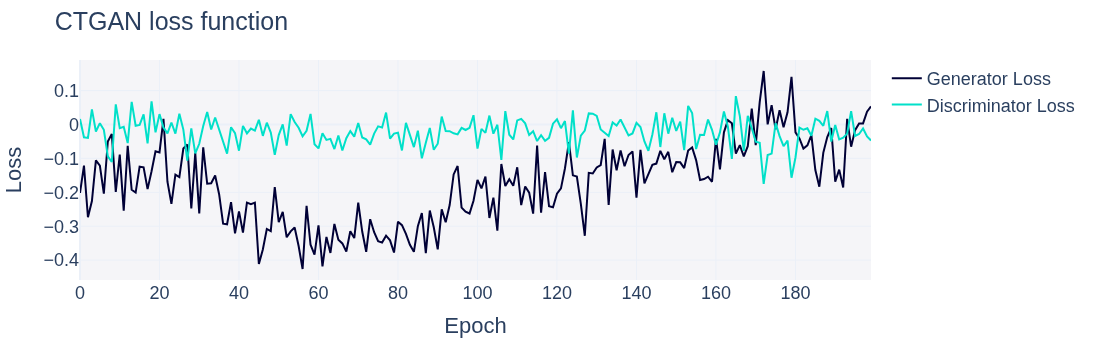

In [10]:
# Visualising the loss functions
fig = ctgan.get_loss_values_plot()
fig.show()

In [11]:
# Saving the model to a pickle file
ctgan.save(
    filepath='models/ctgan.pkl'
)